In [1]:
import pandas as pd
import requests as rq
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

%config InlineBackend.figure_formats = ['retina']
from matplotlib import rcParams
rcParams['figure.facecolor'] = 'white'
rcParams['axes.facecolor'] = 'white'

In [2]:
colors = ['#003049', '#d62828', '#f77f00']

In [3]:
url = 'https://www.superbowl-ads.com/cost-of-super-bowl-advertising-breakdown-by-year/'
#spoofed_ua = 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:12.0) Gecko/20100101 Firefox/12.0'
req = rq.get(url)#, headers={'User-Agent': spoofed_ua})

In [4]:
raw_df = pd.read_html(req.text, header=0, skiprows=1)[0]
raw_df.head()

,Super Bowl,Season,Game Date,Network,Rating,Share,Avg. Cost Per 30-Seconds,Avg. Number of Viewers,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,LVII,2022,Feb 12 2023,FOX,tbd,tbd,"$7,000,000",tbd,NaN,NaN,NaN,NaN
1,LVI,2021,Feb 13 2022,NBC,37,72,"$6,500,000",101100000,NaN,NaN,NaN,NaN
2,LV,2020,Feb 2 2021,CBS,38.2,68,"$5,600,000",91600000,NaN,NaN,NaN,NaN
3,LIV,2019,Feb 2 2020,FOX,41.6,69,"$5,600,000",99900000,NaN,NaN,NaN,NaN
4,LIII,2018,Feb 3 2019,CBS,41.1,67,"$5,200,000",98477000,NaN,NaN,NaN,NaN


In [5]:
superbowl_number = 57
this_year = 2023

df = raw_df.iloc[:superbowl_number+1,:8].copy()
df['Year'] = df['Season'] + 1
df = df.set_index('Year')
df = df.loc[df.index[::-1],:]

dfp = df.iloc[:-1,:].copy()

In [6]:
df['Avg. Cost Per 30-Seconds'] = df['Avg. Cost Per 30-Seconds'].str.replace(r'\D+', '', regex=True).astype(int)
dfp['Avg. Cost Per 30-Seconds'] = dfp['Avg. Cost Per 30-Seconds'].str.replace(r'\D+', '', regex=True).astype(int)
dfp['Avg. Number of Viewers'] = dfp['Avg. Number of Viewers'].astype(int)

In [7]:
# Converts ints to Roman numeral
def numeral(n):
    if n >= 50:
        return "L" + numeral(n - 50)
    if n >= 40:
        return "XL" + numeral(n - 40)
    if n >= 10:
        return "X" + numeral(n - 10)
    if n >= 9:
        return "IX" + numeral(n - 9)
    if n >= 5:
        return "V" + numeral(n - 5)
    if n >= 4:
        return "IV" + numeral(n - 4)
    if n >= 1:
        return "I" + numeral(n - 1)
    return('')


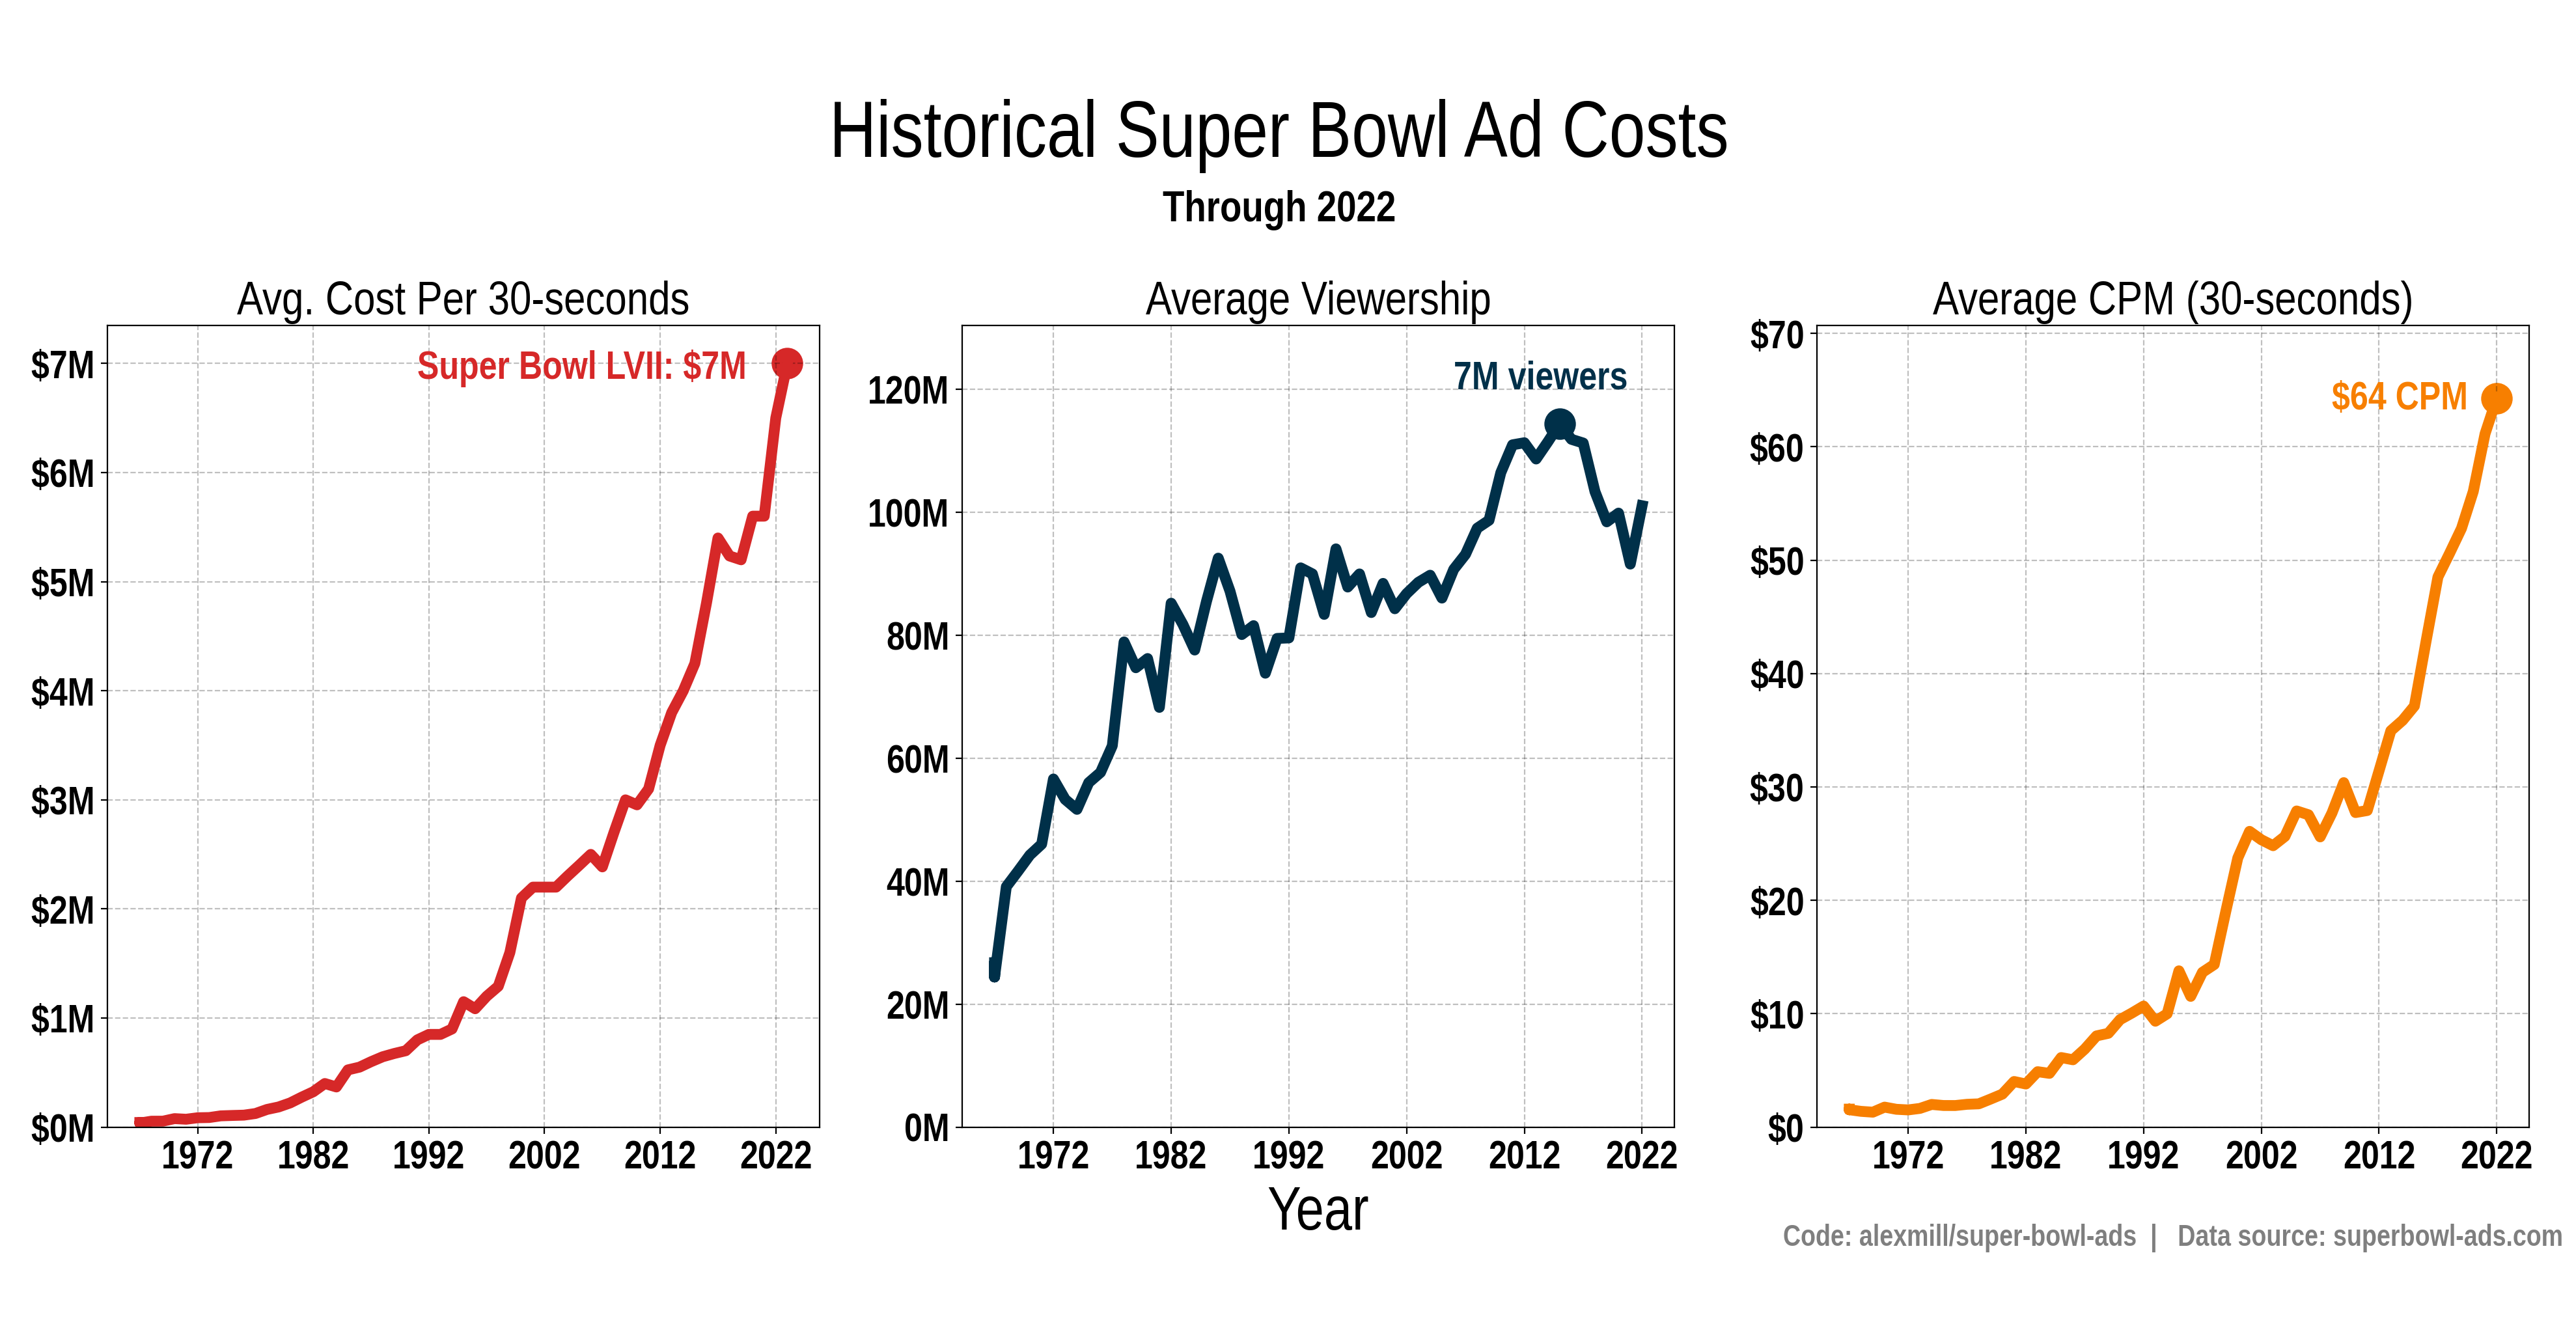

In [8]:
ff = 'Liberation Sans Narrow'
fw = 600
fs = 22
lws = 6

rcParams['font.family'] = ff
rcParams['font.weight'] = fw
rcParams['font.size'] = fs
rcParams['figure.figsize'] = 24, 8



fig, axes = plt.subplots(1,3)#, gridspec_kw={'width_ratios': [1.5, 1]})



# Plot 1

df['Avg. Cost Per 30-Seconds'].plot(
    ax=axes[0], title='Avg. Cost Per 30-seconds',
    color=colors[1], linewidth=lws
)

axes[0].scatter(
    this_year, df['Avg. Cost Per 30-Seconds'].iloc[-1:],
    color=colors[1], s=lws*45
)
axes[0].yaxis.set_major_formatter(
    lambda x, _: f'  ${int(x/1e6)}M'
)

max_ad_cost = df['Avg. Cost Per 30-Seconds'].max().round()
ax1_ymax = (max_ad_cost*1.05).round()
axes[0].set_ylim(0,ax1_ymax)
axes[0].text(
    this_year-32, max_ad_cost*0.98,
     f'Super Bowl {numeral(superbowl_number)}: ${int(max_ad_cost/1e6)}M', size=fs, 
    color=colors[1], alpha=1,
)




# Plot 2
dfp['Avg. Number of Viewers'].plot(
    ax=axes[1], title='Average Viewership', 
    color=colors[0], linewidth=lws
)
axes[1].yaxis.set_major_formatter(
    lambda x, _: f'{int(x/1e6)}M'
)

view_max_x, view_max_y = dfp['Avg. Number of Viewers'].idxmax(), dfp['Avg. Number of Viewers'].max()
axes[1].scatter(
    view_max_x, view_max_y,
    color=colors[0], s=lws*45
)
axes[1].text(
    view_max_x-9, view_max_y*1.05,
     f'{int(max_ad_cost/1e6)}M viewers', size=fs, 
    color=colors[0], alpha=1,
)
axes[1].set_ylim(0,view_max_y*1.14)



# Plot 3
cpm_df = dfp['Avg. Cost Per 30-Seconds']/dfp['Avg. Number of Viewers']*1000
(
    pd.Series(cpm_df)
    .plot(
        ax=axes[2],
        title='Average CPM (30-seconds)',
        color=colors[2], linewidth=lws
    )
)
axes[2].yaxis.set_major_formatter(
    ticker.FormatStrFormatter('$%1.0f')
)
cpm_max_x, cpm_max_y = cpm_df.idxmax(), cpm_df.max()
axes[2].scatter(
    cpm_max_x, cpm_max_y,
    color=colors[2], s=lws*45
)
axes[2].text(
    cpm_max_x-14, cpm_max_y-1,
     f'${int(cpm_max_y)} CPM', size=fs, 
    color=colors[2], alpha=1,
)
axes[2].set_ylim(0,cpm_max_y*1.1)





for idx, ax in enumerate(axes):
    ax.grid(which='major', alpha=0.25, color='black', linestyle='--')
    ax.set_xticks(range(1972,2023, 10))
    if idx!=1:
        ax.set_xlabel(None)
    else:
        ax.set_xlabel('Year\n', fontsize=fs*1.55)
        
        
fig.text(0.5, -0.12, 'Code: alexmill/super-bowl-ads  |   Data source: superbowl-ads.com', size=fs*0.75, alpha=0.5,
        horizontalalignment='center',
        verticalalignment='top',
        transform=ax.transAxes)


_ = plt.suptitle(f'\nHistorical Super Bowl Ad Costs', size=fs*2, y=1.18)
_ = fig.text(0.5, 0.98, f'Through {this_year-1}', ha="center", fontsize=24)